In [1]:
import os,glob,imp,sys
sys.path.append(os.path.expanduser('~/smodels-utils'))
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.interpolate import interp1d
from smodels_utils.dataPreparation.PDFLimitReader import PDFLimitReader
from matplotlib import colors
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
data =  {
        'name': 'CMS-SUS-19-009_Figure_006',
        'x':{'limits': (150, 1400)},
        'y':{'limits': (0, 1200)},
        'z':{'limits': (10**-4, 10), 'log':True},
        }

r = PDFLimitReader( data )

In [13]:
pts = []
xbin = 25.0
ybin = 25.0
for y in np.arange(min(data['y']['limits']),max(data['y']['limits']),ybin):
    for x in np.arange(min(data['x']['limits']),max(data['x']['limits']),xbin):
        if y >= x: continue #Skip points where mLSP > mstop
        if x <= 280.0 and abs(x-(y+170))< 30.: continue #Skip points in the vetoed strip
        UL = r.get_limit(x,y)
        if UL is None:
            continue
        pts.append([x,y,UL])
        
pts = np.array(pts,dtype='float')
print(len(pts))

1335


In [14]:
obsExclusion = np.array(r.exclusions['obsExclusion'])
expExclusion = np.array(r.exclusions['expExclusion'])

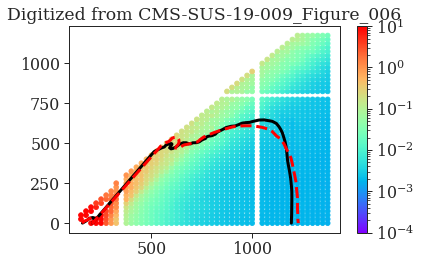

In [20]:
plt.scatter(pts[:,0],pts[:,1],c=pts[:,2],
            norm=colors.LogNorm(vmin=min(data['z']['limits']),vmax=max(data['z']['limits'])),
            cmap='rainbow')
plt.plot(obsExclusion[:,0],obsExclusion[:,1],linewidth=3,color='black')
plt.plot(expExclusion[:,0],expExclusion[:,1],linewidth=3,color='red',linestyle='--')
plt.colorbar()
plt.title('Digitized from %s' %data['name'])
plt.tight_layout()
plt.show()

### Save digitized data

In [21]:
names = ('stop mass (GeV)','LSP mass (GeV)', 'UL (pb)')
header = '%19s'*len(names) %names
header = '#'+header[3:]
np.savetxt(data['name']+'.txt',pts,
           header=header,fmt = ('     %1.7e')*3,
          comments='#Data digitized from\n#http://cms-results.web.cern.ch/cms-results/public-results/publications/SUS-19-009/CMS-SUS-19-009_Figure_006.pdf\n#using PDFLimitReader\n')


In [22]:
names = ('stop mass (GeV)','LSP mass (GeV)')
header = '%19s'*len(names) %names
header = '#'+header[3:]
np.savetxt(data['name']+'_obsExclusion.txt',obsExclusion,
           header=header,fmt = ('     %1.7e')*2,
          comments='#Data digitized from\n#http://cms-results.web.cern.ch/cms-results/public-results/publications/SUS-19-009/CMS-SUS-19-009_Figure_006.pdf\n#using PDFLimitReader\n')


np.savetxt(data['name']+'_expExclusion.txt',expExclusion,
           header=header,fmt = ('     %1.7e')*2,
          comments='#Data digitized from\n#http://cms-results.web.cern.ch/cms-results/public-results/publications/SUS-19-009/CMS-SUS-19-009_Figure_006.pdf\n#using PDFLimitReader\n')
